In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') # 경고 무시

In [3]:
import calendar
from datetime import datetime

In [4]:
# Load dataset
train = pd.read_csv("bike-sharing-demand/train.csv")
test = pd.read_csv("bike-sharing-demand/test.csv")

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.columns.values

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype=object)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [11]:
# Data preprocessing
train['tempDate'] = train.datetime.apply(lambda x:x.split())

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"[2011-01-01, 00:00:00]"
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"[2011-01-01, 01:00:00]"
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"[2011-01-01, 02:00:00]"
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"[2011-01-01, 03:00:00]"
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"[2011-01-01, 04:00:00]"


In [13]:
train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])

# 요일 계산(주말과 아닌날을 분리하기 위함인듯)
train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0], "%Y-%m-%d").weekday()])
train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"[2011-01-01, 00:00:00]",2011,01,01,Saturday,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"[2011-01-01, 01:00:00]",2011,01,01,Saturday,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"[2011-01-01, 02:00:00]",2011,01,01,Saturday,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"[2011-01-01, 03:00:00]",2011,01,01,Saturday,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"[2011-01-01, 04:00:00]",2011,01,01,Saturday,04


In [15]:
# 문자열 데이터 숫자로 변환
train['year'] = pd.to_numeric(train.year, errors='coerce')
train['month'] = pd.to_numeric(train.month, errors='coerce')
train['day'] = pd.to_numeric(train.day, errors='coerce')
train['hour'] = pd.to_numeric(train.hour, errors='coerce')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  weekday     10886 non-null  object 
 17  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [17]:
train = train.drop('tempDate', axis=1)

<AxesSubplot:xlabel='hour', ylabel='count'>

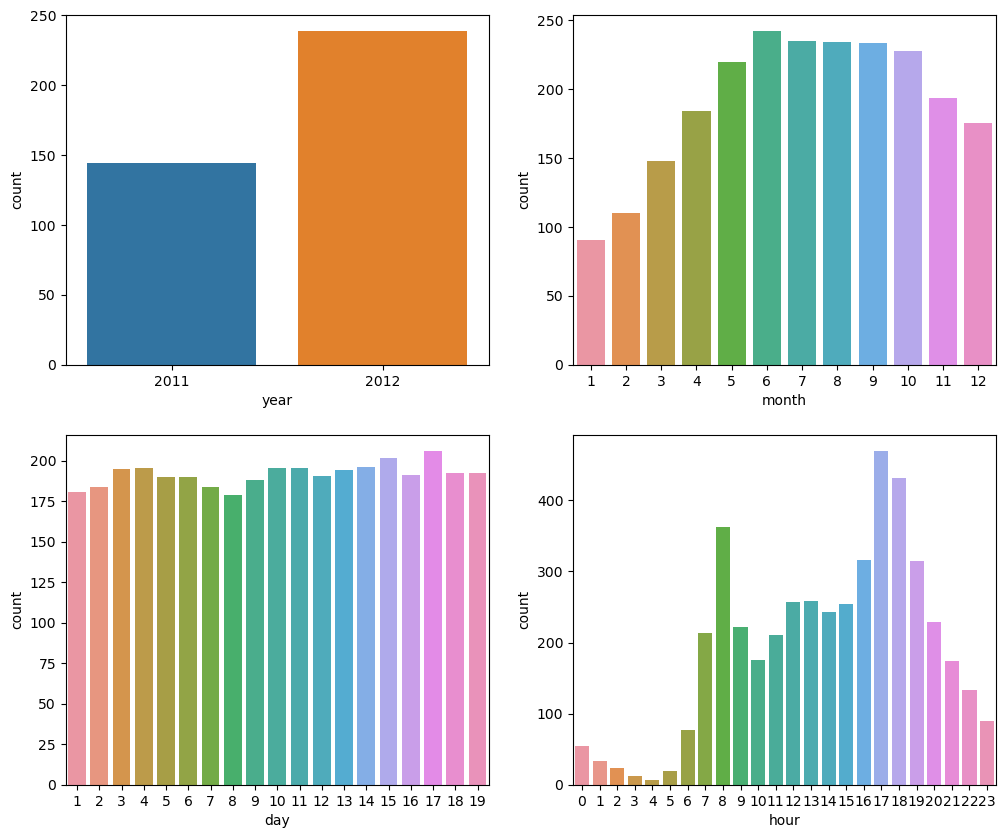

In [18]:
# 각 시간대(연도/월/일/시간) 별 대여 대수의 평균
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 시간대별로 그룹화하여 count의 평균 계산
sns.barplot(x='year', y='count', data=train.groupby('year')['count'].mean().reset_index(), ax=axes[0][0])
sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index(), ax=axes[0][1])
sns.barplot(x='day', y='count', data=train.groupby('day')['count'].mean().reset_index(), ax=axes[1][0])
sns.barplot(x='hour', y='count', data=train.groupby('hour')['count'].mean().reset_index(), ax=axes[1][1])

<AxesSubplot:xlabel='weather', ylabel='count'>

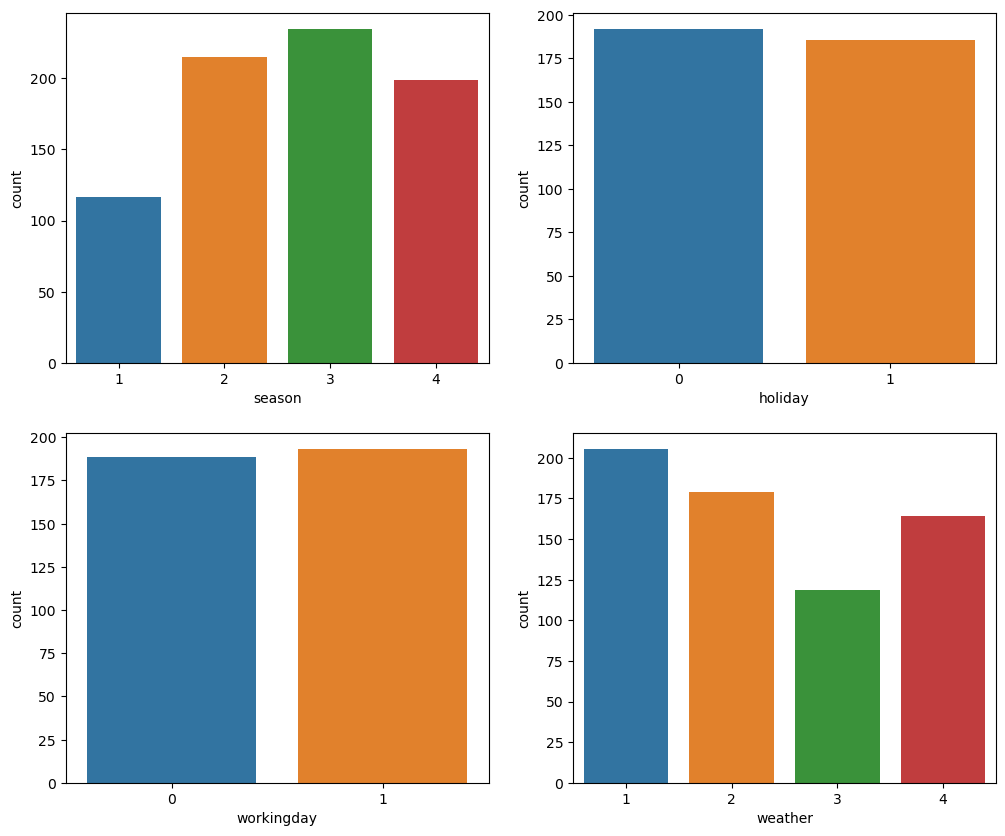

In [19]:
# 각 요소들과 count의 평균값 계산
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(x='season', y='count', data=train.groupby('season')['count'].mean().reset_index(), ax=axes[0][0])
sns.barplot(x='holiday', y='count', data=train.groupby('holiday')['count'].mean().reset_index(), ax=axes[0][1])
sns.barplot(x='workingday', y='count', data=train.groupby('workingday')['count'].mean().reset_index(), ax=axes[1][0])
sns.barplot(x='weather', y='count', data=train.groupby('weather')['count'].mean().reset_index(), ax=axes[1][1])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

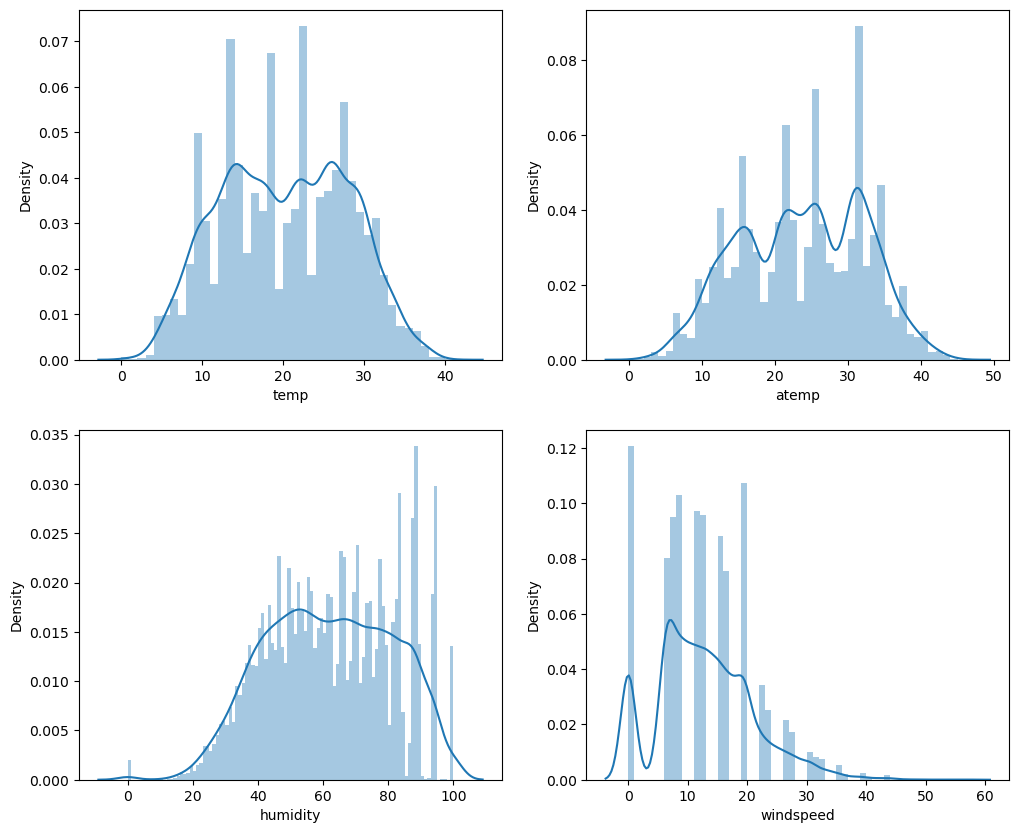

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.distplot(train.temp, bins=range(int(train.temp.min()), int(train.temp.max()) + 1), ax=axes[0][0])
sns.distplot(train.atemp, bins=range(int(train.atemp.min()), int(train.atemp.max()) + 1), ax=axes[0][1])
sns.distplot(train.humidity, bins=range(int(train.humidity.min()), int(train.humidity.max()) + 1), ax=axes[1][0])
sns.distplot(train.windspeed, bins=range(int(train.windspeed.min()), int(train.windspeed.max()) + 1), ax=axes[1][1])


In [21]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540


In [22]:
corr_order = train.corr().loc[:, 'count'].abs().sort_values(ascending=False)
corr_order

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
humidity      0.317371
year          0.260403
month         0.166862
season        0.163439
weather       0.128655
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday       0.005393
Name: count, dtype: float64

<AxesSubplot:xlabel='hour', ylabel='count'>

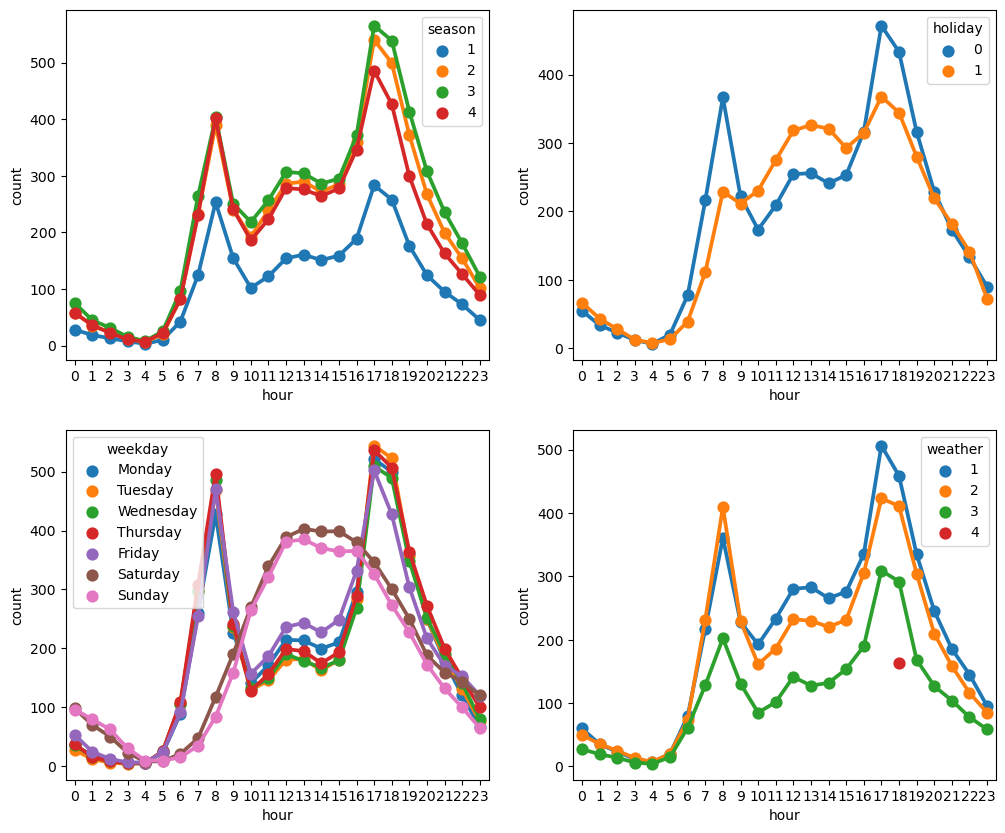

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 시간과 계절에 따른 count
sns.pointplot(x='hour', y='count', hue='season', data=train.groupby(['season', 'hour'])['count'].mean().reset_index(), ax=axes[0][0])
# 시간과 휴일 여부에 따른 count
sns.pointplot(x='hour', y='count', hue='holiday', data=train.groupby(['hour', 'holiday'])['count'].mean().reset_index(), ax=axes[0][1])
# 시간과 요일에 따른 count
sns.pointplot(x='hour', y='count', hue='weekday', hue_order=calendar.day_name[:], data=train.groupby(['weekday', 'hour'])['count'].mean().reset_index(), ax=axes[1][0])
# 시간과 날씨에 따른 count
sns.pointplot(x='hour', y='count', hue='weather', data=train.groupby(['weather', 'hour'])['count'].mean().reset_index(), ax=axes[1][1])

In [24]:
train[train.weather==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,Monday,18


<AxesSubplot:xlabel='month', ylabel='count'>

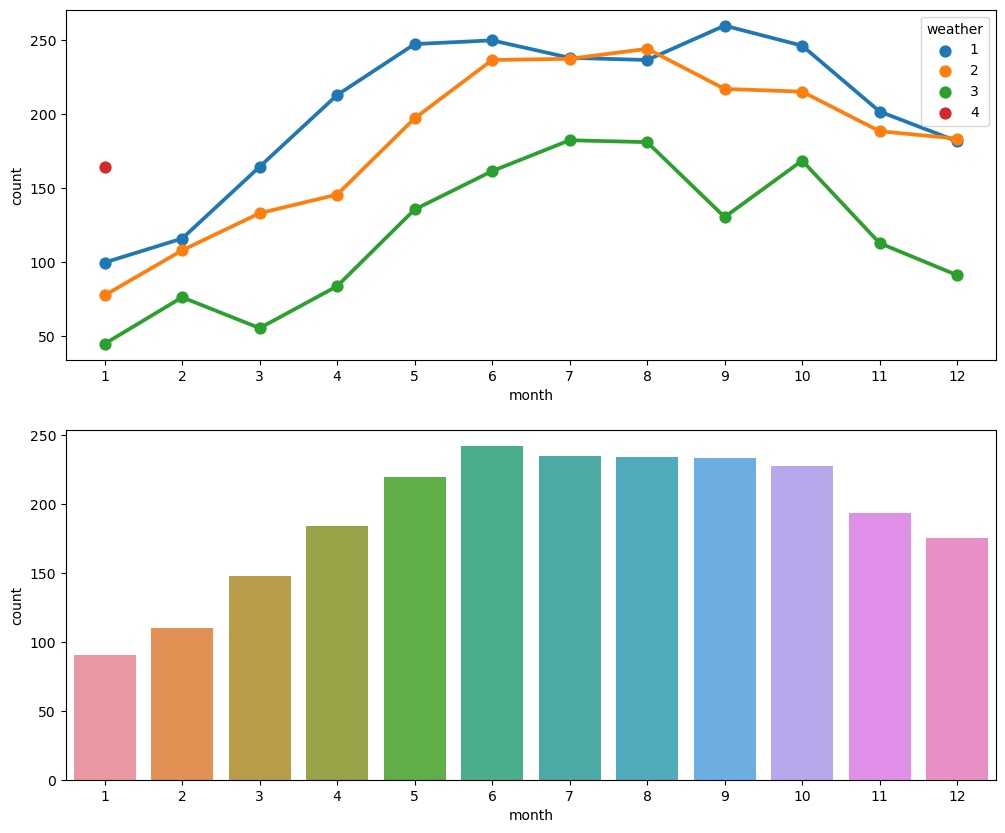

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
# 달과 날씨에 따른 count
sns.pointplot(x='month', y='count', hue='weather', data=train.groupby(['month', 'weather'])['count'].mean().reset_index(), ax=axes[0])
# 달별 count
sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index(), ax=axes[1])

In [26]:
train['weekday']=train['weekday'].astype('category')

In [27]:
print(train['weekday'].cat.categories)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


In [28]:
train['weekday'].cat.categories=['5', '1', '6', '0', '4', '2', '3']

In [29]:
''' 
# 요일 이름과 숫자를 매핑하는 사전
weekday_mapping = { 'Monday': 0,
					'Tuesday': 1, 
					'Wednesday': 2, 
					'Thursday': 3, 
					'Friday': 4, 
					'Saturday': 5, 
					'Sunday': 6 
				   }

# train['weekday']를 숫자로 매핑
train['weekday'] = train['weekday'].map(weekday_mapping)

# 이 방법이 좀 더 나은듯
'''

" \n# 요일 이름과 숫자를 매핑하는 사전\nweekday_mapping = { 'Monday': 0,\n\t\t\t\t\t\t\t\t\t\t'Tuesday': 1, \n\t\t\t\t\t\t\t\t\t\t'Wednesday': 2, \n\t\t\t\t\t\t\t\t\t\t'Thursday': 3, \n\t\t\t\t\t\t\t\t\t\t'Friday': 4, \n\t\t\t\t\t\t\t\t\t\t'Saturday': 5, \n\t\t\t\t\t\t\t\t\t\t'Sunday': 6 }\n\n# train['weekday']를 숫자로 매핑\ntrain['weekday'] = train['weekday'].map(weekday_mapping)\n\n# 이 방법이 좀 더 나은듯\n"

In [30]:
len(train[train['windspeed']==0])

1313

<AxesSubplot:xlabel='count'>

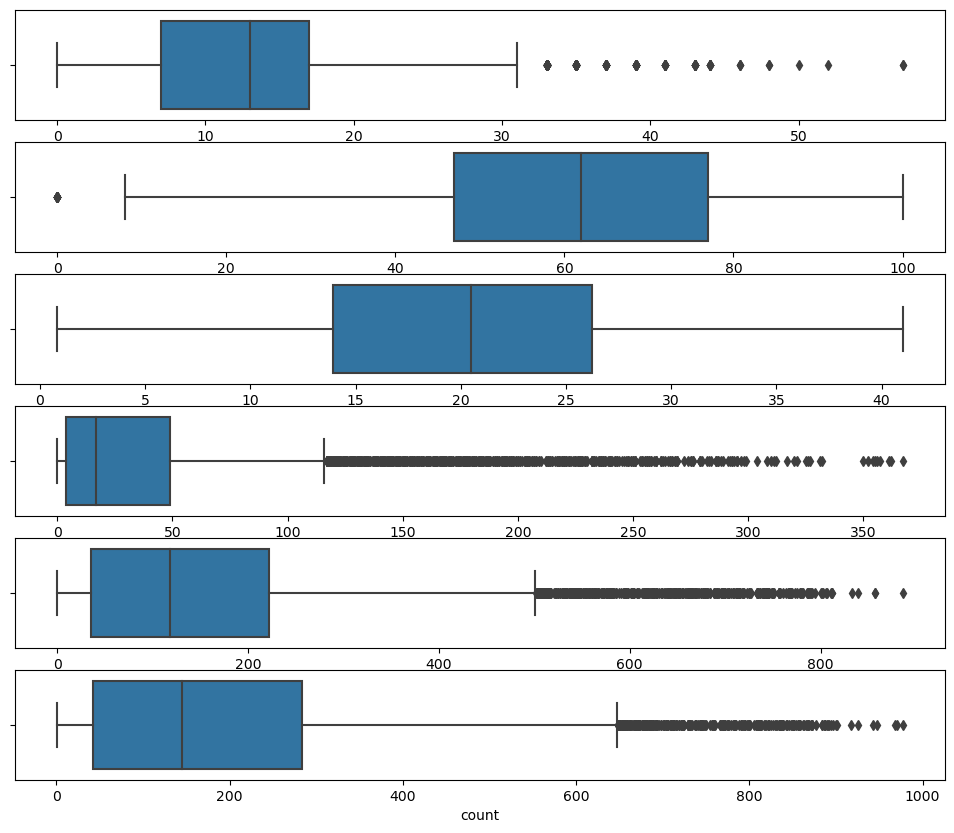

In [31]:
fig, axes = plt.subplots(6, 1, figsize=(12, 10))

sns.boxplot(x='windspeed', data=train, ax=axes[0])
sns.boxplot(x='humidity', data=train, ax=axes[1])
sns.boxplot(x='temp', data=train, ax=axes[2])
sns.boxplot(x='casual', data=train, ax=axes[3])
sns.boxplot(x='registered', data=train, ax=axes[4])
sns.boxplot(x='count', data=train, ax=axes[5])

In [32]:
from sklearn.ensemble import RandomForestRegressor

# 풍속 0
windspeed_0 = train[train.windspeed==0]
# 그 외
windspeed_n0 = train[train.windspeed!=0]

# 풍속과 관계 없는 요소 제거
windspeed_0_df = windspeed_0.drop(['windspeed', 'casual', 'registered', 'count', 'datetime'], axis=1)
# train
windspeed_n0_df = windspeed_n0.drop(['windspeed', 'casual', 'registered', 'count', 'datetime'], axis=1)
windspeed_n0_series = windspeed_n0['windspeed']

rf = RandomForestRegressor()
rf.fit(windspeed_n0_df, windspeed_n0_series)

predicted_windspeed = rf.predict(windspeed_0_df)

windspeed_0['windspeed'] = predicted_windspeed

In [33]:
# 데이터 원래대로 원상복구 및 정렬
train = pd.concat([windspeed_0, windspeed_n0], axis=0)
train.datetime = pd.to_datetime(train.datetime, errors='coerce')

In [34]:
train = train.sort_values(by=['datetime'])

Min value of windspeed is 6.0032


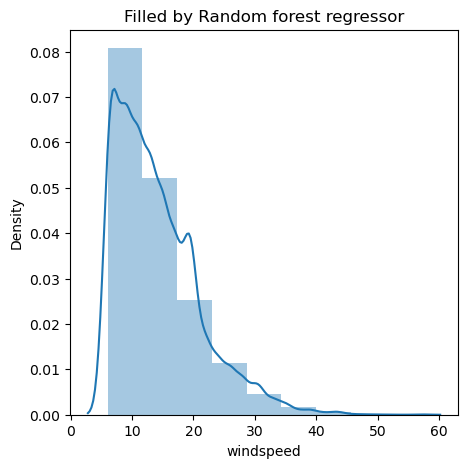

In [35]:
fig = plt.figure(figsize=(5, 5))
sns.distplot(train['windspeed'], bins=np.linspace(train['windspeed'].min(), train['windspeed'].max(), 10))
plt.title("Filled by Random forest regressor")

print("Min value of windspeed is {}".format(train['windspeed'].min()))

In [36]:
# 학습 데이터 만들기
train = pd.read_csv("bike-sharing-demand/train.csv")
test = pd.read_csv("bike-sharing-demand/test.csv")

combine = pd.concat([train, test], axis=0)

In [37]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [38]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0], "%Y-%m-%d").weekday()])
combine['year'] = combine.tempDate.apply(lambda x:x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x:x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x:x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x:x[1].split(':')[0])

In [39]:
date = {'year', 'month', 'day', 'hour'}

for d in date:
    combine[d] = pd.to_numeric(combine[d], errors='coerce')

In [40]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  tempDate    17379 non-null  object 
 13  weekday     17379 non-null  object 
 14  year        17379 non-null  int64  
 15  month       17379 non-null  int64  
 16  day         17379 non-null  int64  
 17  hour        17379 non-null  int64  
dtypes: float64(6), int64(9), object(3)
memory usage: 2.5+ MB


In [41]:
combine['weekday'] = combine['weekday'].astype('category')
weekday_mapping = { 'Sunday':0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6 }

combine['weekday'] = combine['weekday'].map(weekday_mapping)

In [42]:
dataWind0 = combine[combine['windspeed']==0]
dataWindNot0 = combine[combine['windspeed']!=0]

In [43]:
dataWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [44]:
dataWind0df = dataWind0.drop(['windspeed', 'casual', 'registered', 'count', 'datetime', 'tempDate'], axis=1)
dataWindNot0df = dataWindNot0.drop(['windspeed', 'casual', 'registered', 'count', 'datetime', 'tempDate'], axis=1)
dataWindNot0_series = dataWindNot0['windspeed']

In [45]:
rf2 = RandomForestRegressor()
rf2.fit(dataWindNot0df, dataWindNot0_series)
predicted = rf2.predict(dataWind0df)
print(predicted)

[ 7.122368  6.952456  6.832526 ...  8.702161 25.100143 12.770401]


In [46]:
dataWind0['windspeed'] = predicted

combine = pd.concat([dataWind0, dataWindNot0], axis=0)

In [47]:
# 학습에 포함시킬 column과 아닌 column 분리
# 이 중 categoric으로 바꿀 수 있는 데이터들은 category로 변환
categorizational_columns = ['holiday', 'humidity', 'season', 'weather', 'workingday', 'month', 'day', 'hour']
drop_columns = ['datetime', 'casual', 'registered', 'count', 'tempDate']

for col in categorizational_columns:
    combine[col] = combine[col].astype('category')

In [48]:
# count의 유무로 훈련과 데스트셋 분리
train = combine[pd.notnull(combine['count'])].sort_values(by='datetime')
test = combine[~pd.notnull(combine['count'])].sort_values(by='datetime')

datetimecol = test['datetime']
Y_train = train['count']
Y_registered = train['registered']
Y_casual = train['casual']

In [49]:
# 필요없는 열 제거
train = train.drop(drop_columns, axis = 1)
test = test.drop(drop_columns, axis=1)

In [50]:
# RMSLE 방식을 통한 예측 평가

# y is predict value y_ is actual value
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()

Y_train_log = np.log1p(Y_train)
lr.fit(train, Y_train_log)
pred = lr.predict(train)

pred

array([2.27494694, 2.35342753, 2.45089621, ..., 5.77507969, 5.87220937,
       5.88525598])

In [52]:
print('RMSLE value for train dataset:{}'.format(rmsle(np.exp(Y_train_log), np.exp(pred), False)))

RMSLE value for train dataset:0.9773074521918013


<Figure size 800x800 with 0 Axes>

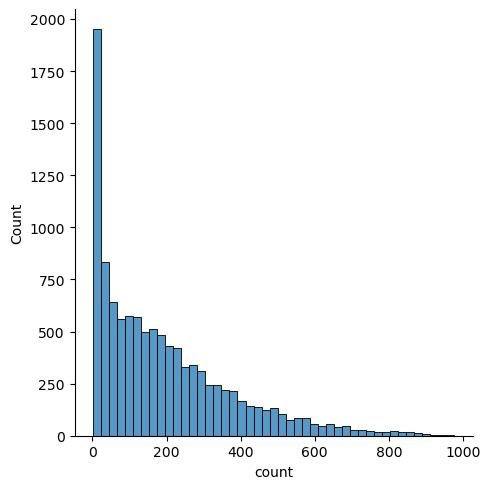

In [53]:
fig = plt.figure(figsize=(8, 8))
sns.displot(Y_train)

In [54]:
# Grid search
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge = Ridge()

ridge_params = { 'max_iter':[3000], 'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False) # RMSLE는 작을 수록 좋음
grid_ridge = GridSearchCV(ridge, ridge_params, scoring=rmsle_scorer, cv=5)

grid_ridge.fit(train, Y_train_log)
pred = grid_ridge.predict(train)
print(grid_ridge.best_params_)

print('RMSLE value for ridge regressions : {}'.format(rmsle(np.exp(Y_train_log), np.exp(pred), False)))

{'alpha': 0.001, 'max_iter': 3000}
RMSLE value for ridge regressions : 0.9773074519653175


In [56]:
df = pd.DataFrame(grid_ridge.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005750,0.002944,0.006333,0.001402,0.001,3000,"{'alpha': 0.001, 'max_iter': 3000}",-1.000545,-0.904191,-1.033735,-1.008576,-0.980677,-0.985545,0.044090,1
1,0.005241,0.002137,0.005811,0.003102,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-1.000545,-0.904191,-1.033735,-1.008575,-0.980677,-0.985545,0.044090,2
2,0.003604,0.001144,0.003487,0.000146,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-1.000547,-0.904191,-1.033736,-1.008574,-0.980677,-0.985545,0.044091,3
3,0.003027,0.001315,0.003843,0.000702,1,3000,"{'alpha': 1, 'max_iter': 3000}",-1.000561,-0.904192,-1.033745,-1.008562,-0.980677,-0.985548,0.044092,4
4,0.003326,0.001454,0.003671,0.000374,10,3000,"{'alpha': 10, 'max_iter': 3000}",-1.000702,-0.904206,-1.033836,-1.008446,-0.980678,-0.985574,0.044104,5
5,0.003031,0.000547,0.004186,0.001130,100,3000,"{'alpha': 100, 'max_iter': 3000}",-1.002259,-0.904552,-1.034818,-1.007522,-0.980948,-0.986020,0.044204,6
6,0.003437,0.000855,0.004014,0.000883,1000,3000,"{'alpha': 1000, 'max_iter': 3000}",-1.020632,-0.915039,-1.046070,-1.007629,-0.992803,-0.996435,0.044301,7


In [57]:
lasso = Lasso()

lasso_params = {'max_iter':[3000], 'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 100]}
grid_lasso = GridSearchCV(lasso, lasso_params, scoring=rmsle_scorer, cv=5)
grid_lasso.fit(train, Y_train_log)

pred = grid_lasso.predict(train)
print('RMSLE value for lasso regressions : {}'.format(rmsle(np.exp(Y_train_log), np.exp(pred), False)))

RMSLE value for lasso regressions : 0.9773288135602526


In [59]:
rf = RandomForestRegressor()

rf_params = {'n_estimators':[1, 10, 100]}
grid_rf = GridSearchCV(rf, rf_params, scoring=rmsle_scorer, cv=5)
grid_rf.fit(train, Y_train_log)

pred = grid_rf.predict(train)
print('RMLSE value for random forest regressions : {}'.format(rmsle(np.exp(Y_train_log), np.exp(pred), False)))

RMLSE value for lasso regressions : 0.10335225529085308


In [63]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb_params = {'max_depth':range(1, 11, 1), 'n_estimators':[1, 10, 100]}
grid_gb = GridSearchCV(gb, gb_params, scoring=rmsle_scorer, cv=5)
grid_gb.fit(train, Y_train_log)

pred = grid_gb.predict(train)
print('RMLSE value for gradient boosting regressions : {}'.format(rmsle(np.exp(Y_train_log), np.exp(pred), False)))

RMLSE value for gradient boosting regressions : 0.24399105615614836


In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb_params = {'max_depth':range(1, 11, 1), 'n_estimators':range(100, 500, 100)}
grid_gb = GridSearchCV(gb, gb_params, scoring=rmsle_scorer, cv=5)
grid_gb.fit(train, Y_train_log)

pred = grid_gb.predict(train)
print('RMLSE value for gradient boosting regressions : {}'.format(rmsle(np.exp(Y_train_log), np.exp(pred), False)))

RMLSE value for gradient boosting regressions : 0.20899010673144014


In [66]:
grid_gb.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [67]:
pred

array([3.07933189, 3.44441978, 3.09318321, ..., 5.13416081, 4.96487069,
       4.42297899])

In [68]:
predTest = grid_gb.predict(test)

In [72]:
predTest

array([2.58974072, 1.90606015, 1.54115331, ..., 4.76041891, 4.53216383,
       4.00090556])

In [73]:
submission = pd.DataFrame({
    "datetime": datetimecol,
    "count": [max(0, x) for x in np.exp(predTest)]
})

In [74]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,13.326316
1,2011-01-20 01:00:00,6.726535
2,2011-01-20 02:00:00,4.669973
3,2011-01-20 03:00:00,3.246061
4,2011-01-20 04:00:00,3.155526


In [75]:
submission.to_csv("submission.csv", index=False)